<h1>ENB18</h1><br>
<h2>optimiser comparison on most sucessful FFNN 480r + 480s + 7sigmoid</h2><br>
neurons =  480
layers = 2,3,4,5

In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import pre_process as pp
import pickle
import time

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

<h2>Pre-processing</h2>

In [2]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

<h2>Exp:a</h2><br>
2 layer, 720 neurons

In [3]:
def build_net1():
    net1 = models.Sequential()
    net1.add(layers.Dense(480, input_shape = (480,6)))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'softmax'))
    net1.add(layers.Flatten())
    net1.add(layers.Dense(7, activation = 'sigmoid'))
    net1.summary()
    return net1

In [4]:
def train_test1(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):    
    net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net.evaluate(test_data, test_labels)
    test_results.insert(0,'adam')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist

<h2>Exp:b</h2><br>
2layer 600 nuerons

In [5]:
def build_net2():
    net1 = models.Sequential()
    net1.add(layers.Dense(480, input_shape = (480,6)))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'softmax'))
    net1.add(layers.Flatten())
    net1.add(layers.Dense(7, activation = 'sigmoid'))
    net1.summary()
    return net1

In [6]:
def train_test2(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net.evaluate(test_data, test_labels)
    test_results.insert(0,'sgd')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist

<h2>Exp:c</h2><br>
2layer 480 nuerons

In [7]:
def build_net3():
    net1 = models.Sequential()
    net1.add(layers.Dense(480, input_shape = (480,6)))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'softmax'))
    net1.add(layers.Flatten())
    net1.add(layers.Dense(7, activation = 'sigmoid'))
    net1.summary()
    return net1

In [8]:
def train_test3(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net.evaluate(test_data, test_labels)
    test_results.insert(0,'RMSprop')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist

<h2>Exp:d</h2>
<br>
2layer 360 neurons

In [9]:
def build_net4():
    net1 = models.Sequential()
    net1.add(layers.Dense(480, input_shape = (480,6)))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'relu'))
    net1.add(layers.Dense (480, activation = 'softmax'))
    net1.add(layers.Flatten())
    net1.add(layers.Dense(7, activation = 'sigmoid'))
    net1.summary()
    return net1

In [10]:
def train_test4(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net.evaluate(test_data, test_labels)
    test_results.insert(0,'480x4r+480s')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist

<h2>Exp:e</h2><br>
2layer 240 neurons

In [11]:
def build_net5():
    net1 = models.Sequential()
    net1.add(layers.Dense(480, input_shape = (480,6)))
    net1.add(layers.Dense (240, activation = 'relu'))
    net1.add(layers.Dense (240, activation = 'softmax'))
    net1.add(layers.Flatten())
    net1.add(layers.Dense(7, activation = 'sigmoid'))
    net1.summary()
    return net1

In [12]:
def train_test5(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net.evaluate(test_data, test_labels)
    test_results.insert(0,'240r,240s')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist

<h2>Exp:f</h2>
<br>
2layer 120 neurons

In [13]:
def build_net6():
    net1 = models.Sequential()
    net1.add(layers.Dense(480, input_shape = (480,6)))
    net1.add(layers.Dense (120, activation = 'relu'))
    net1.add(layers.Dense (120, activation = 'softmax'))
    net1.add(layers.Flatten())
    net1.add(layers.Dense(7, activation = 'sigmoid'))
    net1.summary()
    return net1

In [14]:
def train_test6(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net.evaluate(test_data, test_labels)
    test_results.insert(0,'120r,120s')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist

In [9]:
def start(data, labels):
    start = time.time()
    summary = []
    histories = []
    i = 1
    test_no = 1
    while i < 2:
        train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)
        net1 = build_net1()
        test_no, summary1, history1 = train_test1(net1, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
        histories.append(history1)
        net2 = build_net2()        
        test_no, summary2, history2 = train_test2(net2, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
        histories.append(history2)
        net3 = build_net3()        
        test_no, summary3, history3 = train_test3(net3, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
        histories.append(history3)
        #net4 = build_net4()        
        #test_no, summary4, history4 = train_test4(net4, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
        #histories.append(history4)
        #net5 = build_net5()        
        #test_no, summary5, history5 = train_test5(net5, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
        #histories.append(history5)
        #net6 = build_net6()        
        #test_no, summary6, history6 = train_test6(net6, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
        #histories.append(history6)
        summary = summary + summary1 + summary2 + summary3 
        i = i + 1 
    print(summary)
    end = time.time()
    elapsed = end - start
    print('Time elapsed: ', elapsed)
    with open('ENB18_results.txt', 'wb') as fp:
        pickle.dump(summary, fp)
    with open('ENB18_histories.txt', 'wb') as fp:
        pickle.dump(histories, fp)
    return summary, histories

In [10]:
summary, histories = start(data, labels)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_2 (Dense)              (None, 480, 480)          230880    
_________________________________________________________________
dense_3 (Dense)              (None, 480, 480)          230880    
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 1612807   
Tota

Train on 52 samples, validate on 18 samples
Epoch 1/100
52/52 [==============================] - 1s 18ms/step - loss: 1.9460 - accuracy: 0.1731 - val_loss: 1.9459 - val_accuracy: 0.1667
Epoch 2/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1731 - val_loss: 1.9457 - val_accuracy: 0.1667
Epoch 3/100
52/52 [==============================] - 1s 14ms/step - loss: 1.9457 - accuracy: 0.1731 - val_loss: 1.9456 - val_accuracy: 0.1667
Epoch 4/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9455 - accuracy: 0.1731 - val_loss: 1.9455 - val_accuracy: 0.1667
Epoch 5/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9453 - accuracy: 0.1731 - val_loss: 1.9453 - val_accuracy: 0.1667
Epoch 6/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9452 - accuracy: 0.1731 - val_loss: 1.9452 - val_accuracy: 0.1667
Epoch 7/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9451 - accuracy: 0.1731 - va

52/52 [==============================] - 1s 13ms/step - loss: 1.9373 - accuracy: 0.1731 - val_loss: 1.9389 - val_accuracy: 0.1667
Epoch 59/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9371 - accuracy: 0.1731 - val_loss: 1.9388 - val_accuracy: 0.1667
Epoch 60/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9370 - accuracy: 0.1731 - val_loss: 1.9387 - val_accuracy: 0.1667
Epoch 61/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9369 - accuracy: 0.1731 - val_loss: 1.9386 - val_accuracy: 0.1667
Epoch 62/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9367 - accuracy: 0.1731 - val_loss: 1.9385 - val_accuracy: 0.1667
Epoch 63/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9366 - accuracy: 0.1731 - val_loss: 1.9383 - val_accuracy: 0.1667
Epoch 64/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9364 - accuracy: 0.1731 - val_loss: 1.9382 - val_accuracy: 0.1667
Epoch 65/100

52/52 [==============================] - 1s 14ms/step - loss: 0.0962 - accuracy: 0.9808 - val_loss: 0.9075 - val_accuracy: 0.6667
Epoch 65/100
52/52 [==============================] - 1s 13ms/step - loss: 0.3549 - accuracy: 0.9038 - val_loss: 0.6657 - val_accuracy: 0.7778
Epoch 66/100
52/52 [==============================] - 1s 14ms/step - loss: 0.0797 - accuracy: 1.0000 - val_loss: 0.5995 - val_accuracy: 0.8889
Epoch 67/100
52/52 [==============================] - 1s 14ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.5823 - val_accuracy: 0.8889
Epoch 68/100
52/52 [==============================] - 1s 14ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.5999 - val_accuracy: 0.8333
Epoch 69/100
52/52 [==============================] - 1s 13ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.5824 - val_accuracy: 0.8889
Epoch 70/100
52/52 [==============================] - 1s 13ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.6666 - val_accuracy: 0.7778
Epoch 71/100

In [12]:
history1 = histories[0]
history2 = histories[1]
history3 = histories[2]
#history4 = histories[3]
#history5 = histories[4]
#history6 = histories[5]

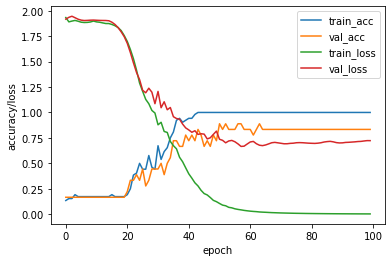

In [13]:
pp.plot_hist(history1)

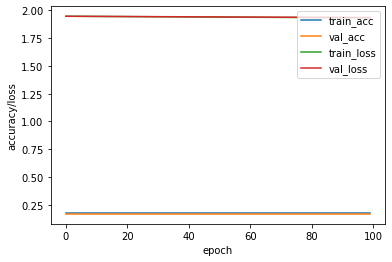

In [14]:
pp.plot_hist(history2)

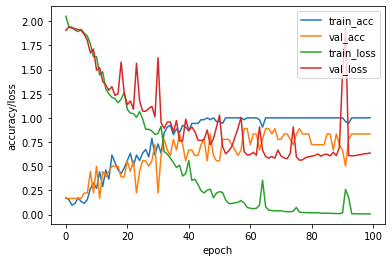

In [15]:
pp.plot_hist(history3)

In [16]:
#pp.plot_hist(history4)

In [22]:
#pp.plot_hist(history5)

In [23]:
#pp.plot_hist(history6)

In [3]:
#with open('ENB18_histories.txt', 'rb') as fp:
#    histories = pickle.load(fp)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [4]:
#with open('ENB18_results.txt', 'rb') as fp:
#    summary = pickle.load(fp)

In [18]:
results = pp.results_to_df(summary)

In [19]:
results

,0,1,Test_Loss,Test_Accuracy
2,RMSprop,3,0.365367,0.882353
0,adam,1,0.386745,0.882353
1,sgd,2,1.929900,0.176471
